#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 4
#### Topics:
- ANOVA


#### Due: 10/05/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>

**Name**: Ofir Nesher

**Student ID**:

**Date**: 01/05/2022

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

# Problem 1 (Solving LS using SVD)
Consider the housing prices dataset (``housing_prices.csv``). Use houses of lot size smaller than 15000 ft.

1. Find the least squares coefficient of the linear model with target variable ``SalePrice`` and the 16 predictors:
``['LotArea',  'YearBuilt',
  'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
  'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
  '1stFlrSF', 'LotFrontage', 'ScreenPorch',
   'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']`` 
plus a constant term. Remove all entries in which one or more of these predictors is missing. 
 - By inverting the matrix $Z^\top Z$. Denote the solution $\hat{\beta}$.
 - Using the SVD method. Here, decide that $\sigma_i > 0$ if $\sigma_i / \sigma_1 > 10^{-6}$. Denote the solution $\hat{\beta}^{SVD}$.
 - In which method $R^2$ is smaller?
2. Plot $\hat{y}$ and $\hat{y}^{SVD}$ over the same panel to convince yourself that both methods resulted in similar fitted responses.
3. Plot $\log(|\hat{\beta}_i/\hat{\beta}^{SVD}_i|)$ vs. $i$ for $i=1,\ldots,p$ and indicate the covariate whose coefficient exhibits the largest difference between the methods.

The point: When there are many predictors, it is likely that $Z$ will be rank deficient in the sense that some of its singular values are very small. Removing those singular values is usually a good practice; it is important to observe how this removal affects the solution. 

The largest difference is for the first predictor, which is the constant covariate. We can check that this result makes sense by fitting a new model without the constant covaraite and test whether the residuals in the smaller new model are not significantly different from those in the original model.

You can use the code below to read and arrange the data

In [1]:
import pandas as pd
import numpy as np

target = 'SalePrice'
lo_predictors = ['const', 'SalePrice', 'LotArea', 'YearBuilt',
                 'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
                 'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
                 '1stFlrSF', 'LotFrontage', 'ScreenPorch',
                 'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']

data = pd.read_csv("../../datasets/housing_prices.csv")
data = data[data.LotArea < 15000]  # we focus on small lots
data['const'] = 1  # add constant term
data = data.filter(lo_predictors).dropna()  # remove all other columns

y = data[target].values
X = data.drop(target, axis=1)
Z = X.values
n, p = Z.shape

### **Answers**:

#### 1.

In [2]:
betas_hat = np.dot((np.dot(np.linalg.inv(np.dot(Z.T, Z)), Z.T)), y)
y_hat = Z.dot(betas_hat)

In [3]:
for i, feature in enumerate(X.columns):
    print(f'beta_{i} ({feature}) = {betas_hat[i]}')

beta_0 (const) = -3039719.7473972607
beta_1 (LotArea) = 2.978147078825324
beta_2 (YearBuilt) = 616.8396784183672
beta_3 (GarageCars) = 21256.547086586994
beta_4 (YrSold) = 884.947468226511
beta_5 (MoSold) = 983.7943649331282
beta_6 (Fireplaces) = 16763.359424801165
beta_7 (HalfBath) = 27915.651037324198
beta_8 (LowQualFinSF) = 68.9605188925043
beta_9 (TotalBsmtSF) = 43.89618695663697
beta_10 (1stFlrSF) = 41.275209770602615
beta_11 (LotFrontage) = 0.7334589910932579
beta_12 (ScreenPorch) = 22.66802592642765
beta_13 (WoodDeckSF) = 30.830913850699808
beta_14 (OverallCond) = 7715.939211039259
beta_15 (BsmtUnfSF) = -8.101915234048915


In [4]:
def r_squared(y, y_hat):
    SS_Tot = np.sum((y - y.mean()) ** 2)
    SS_Fit = np.sum((y_hat - y.mean()) ** 2)
    # SS_Res = np.sum((y - y_hat) ** 2)
    return SS_Fit / SS_Tot

In [5]:
r_squared_inverting_matrices = r_squared(y, y_hat)
print(f'R^2 (inverting matrices): {r_squared_inverting_matrices}')

R^2 (inverting matrices): 0.7452057267971758


In [6]:
# obtaining the parameters of regression line
betas_hat_svd = np.linalg.lstsq(Z, y, rcond=1e-6)[0]

In [7]:
for i, feature in enumerate(X.columns):
    print(f'beta_{i} ({feature}) = {betas_hat_svd[i]}')

beta_0 (const) = -0.266231312303028
beta_1 (LotArea) = 2.9401528610129866
beta_2 (YearBuilt) = 612.3735023873162
beta_3 (GarageCars) = 21197.773769542073
beta_4 (YrSold) = -624.392416902004
beta_5 (MoSold) = 866.6457357525275
beta_6 (Fireplaces) = 16647.23140297543
beta_7 (HalfBath) = 28030.112432658545
beta_8 (LowQualFinSF) = 68.0687160046746
beta_9 (TotalBsmtSF) = 44.099044051840146
beta_10 (1stFlrSF) = 41.41205428390003
beta_11 (LotFrontage) = 6.732205544655242
beta_12 (ScreenPorch) = 23.273619386477417
beta_13 (WoodDeckSF) = 31.800690406266177
beta_14 (OverallCond) = 7708.386069982852
beta_15 (BsmtUnfSF) = -8.177081935194206


In [8]:
y_hat_svd = Z.dot(betas_hat_svd)

In [9]:
r_squared_svd = r_squared(y, y_hat_svd)
print(f'R^2 (SVD): {r_squared_svd}')

R^2 (SVD): 0.7444313767589703


In [10]:
if r_squared_svd > r_squared_inverting_matrices:
    print(f'R^2 (SVD) is larger than R^2 (inverting matrices)')
elif r_squared_svd < r_squared_inverting_matrices:
    print(f'R^2 (SVD) is smaller than R^2 (inverting matrices)')
else:
    print('R^2 (SVD) and R^2 (inverting matrices) are equal')

R^2 (SVD) is smaller than R^2 (inverting matrices)


#### 2.

In [11]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 7)
plt.rcParams.update({'font.size': 18})

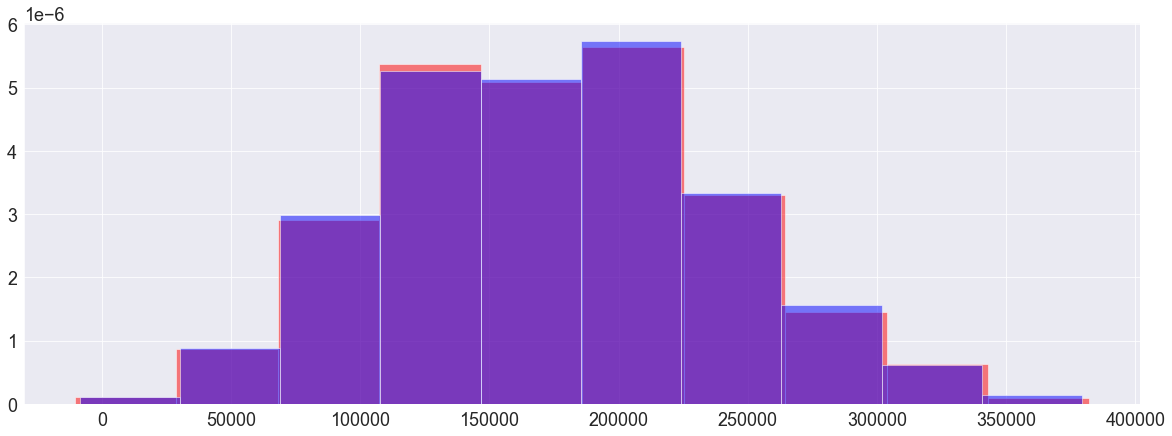

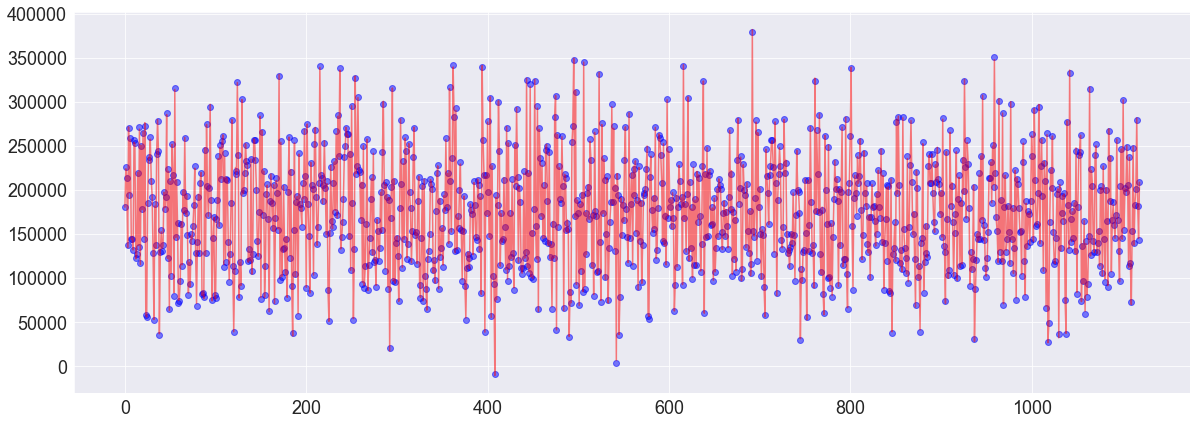

Both methods resulted in similar fitted responses! :)


In [12]:
plt.hist(y_hat, alpha=.5, color='r', density=True)
plt.hist(y_hat_svd, alpha=.5, color='b', density=True)
plt.show()

x_axis = range(len(y))
plt.plot(x_axis, y_hat, alpha=.5, color='r')
plt.scatter(x_axis, y_hat_svd, alpha=.5, color='b')
plt.show()
print('Both methods resulted in similar fitted responses! :)')

#### 3.

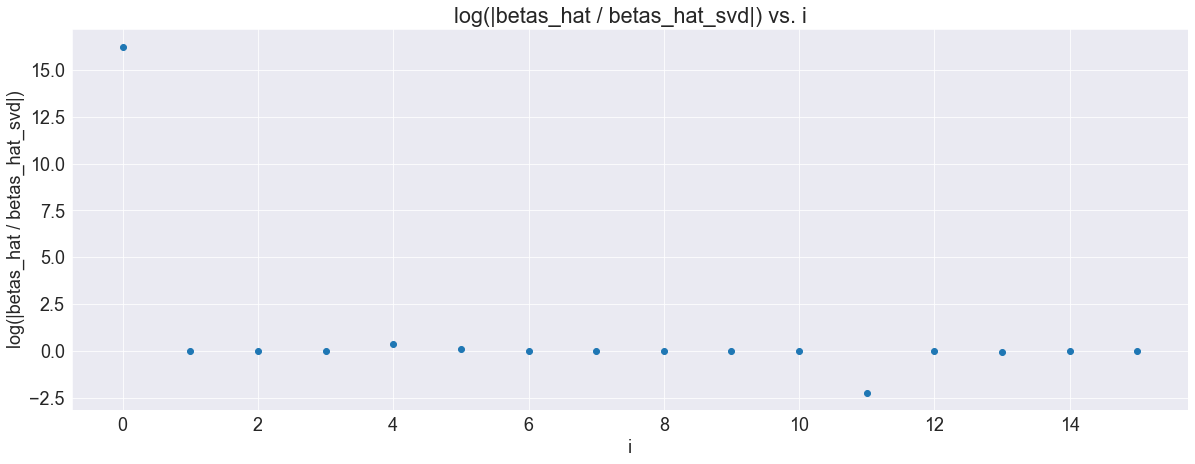

We can see that the covariate whose coefficient exhibits the largest difference between the methods is the first predictor at i=0, which is the constant covariate.


In [13]:
plt.scatter(list(range(0, p)), np.log(np.abs(betas_hat / betas_hat_svd)))
plt.xlabel('i')
plt.ylabel('log(|betas_hat / betas_hat_svd|)')
plt.title('log(|betas_hat / betas_hat_svd|) vs. i')
plt.show()

print(
    'We can see that the covariate whose coefficient exhibits the largest difference between the methods is the first predictor at i=0, which is the constant covariate.')

---
## Problem 2 ($t$-test is a kind of ANOVA)
Consider the following two-sample problem. The data is
$$
y_{ij} = \mu_i + \epsilon_{ij},\qquad j=1,\ldots,n_i,\quad i=0,1.
$$

1. Find the statistic $t$ for the two-sample $t$ test (using of the observable variables)
2. Write the ANOVA table for $k=2$ and find the F statistic $F$ (using of the observable variables)
3. Conclude that $t^2 = F$.
4. Does the test that rejects when $|t| > t_{n-1}^{1-\alpha/2}$ has larger power than the test that rejects when $F > F_{1,n-1}^{1-\alpha}$? less? same?

### **Answers**:

#### 1.
Cell mean model:
$y_{ij} = \mu_i + \epsilon_{ij},\qquad j=1,\ldots,n_i,\quad i=0,1$
$\epsilon_{ij} \sim^{iid}  N(0, \sigma^2)$


As seen in lecture 6, we can rewrite this model in matrix notation:
$Y \sim N(Z\beta, \sigma^2 I_n)$ 
where

$$
Y = \begin{bmatrix}
 y_{01} \\
 y_{02} \\
 \vdots \\
 y_{0 n_0} \\
 y_{11} \\
 y_{12} \\
 \vdots \\
 y_{1 n_1}
\end{bmatrix}
$$

$$Z = \begin{bmatrix}
 1 & 0\\
 1 & 0\\
 \vdots & \vdots \\
 1 & 0\\
 0 & 1\\
 0 & 1\\
 \vdots & \vdots \\
 0 & 1\\
\end{bmatrix}
\in \mathbb{R}^{n \times 2}
$$

$$\beta = 
\begin{bmatrix}
 \mu_0 \\
 \mu_1 \\
\end{bmatrix}
$$

Our null hypothesis is $H_0: \mu_0 = \mu_1$.

We will develop a test against $H_0$ based on properties of the linear model.

$\bar{Y_0} = \frac{1}{n_0}\sum_{i=1}^{n_0} Y_i$


$$
t = \frac{\bar{Y_1} - \bar{Y_0}}{s \sqrt{\frac{1}{n_1} + \frac{1}{n_0}}}
$$

$$s
=
\sqrt{
\frac
{\sum_{i=1}^{n_1}(y_{1i}-\mu_1)^2 + \sum_{i=1}^{n_0}(y_{0i}-\mu_0)^2 }
{n_0+n_1-2}}
$$

#### 2.

In [14]:
print("""
Source    Dof       SS             MS                              F
Groups    k-1       SS_between     MS_between=SS_between/(k-1)     MS_between/MS_within
Error     n-k       SS_within      MS_within=SS_within/(n-k)
Total     n-1       SS_total
""")


Source    Dof       SS             MS                              F
Groups    k-1       SS_between     MS_between=SS_between/(k-1)     MS_between/MS_within
Error     n-k       SS_within      MS_within=SS_within/(n-k)
Total     n-1       SS_total



where
$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,\qquad \mathrm{SS}_{within} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
$$

In [15]:
print("""
Source    Dof       SS                               MS                              F
Groups    1         SS_between                       SS_between                      (n-2)*(SS_between/SS_within)
Error     n-2       SS_within                        SS_within/(n-2)
Total     n-1       SS_total=SS_between+SS_within
""")


Source    Dof       SS                               MS                              F
Groups    1         SS_between                       SS_between                      (n-2)*(SS_between/SS_within)
Error     n-2       SS_within                        SS_within/(n-2)
Total     n-1       SS_total=SS_between+SS_within



#### 3.
$$
t^2 = \frac{(\bar{Y_1} - \bar{Y_0})^2}{s^2 (\frac{1}{n_1} + \frac{1}{n_0})} = \frac{(\bar{Y_1} - \bar{Y_0})^2}{s^2 (\frac{n_0 + n_1}{n_0 n_1})} =
$$

$$
\frac{n_0 n_1}{n_0 + n_1} \frac{(\bar{Y_1} - \bar{Y_0})^2}{s^2} =
$$

$\bar{Y_0} = \mu_0$, $\bar{Y_1} = \mu_1$

So 
$$s^2
=
\frac
{\sum_{i=1}^{n_1}(y_{1i}-\mu_1)^2 + \sum_{i=1}^{n_0}(y_{0i}-\mu_0)^2 }
{n_0+n_1-2} = \frac{\mathrm{SS}_{within}}{n-2}$$

Also,

$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = n_0(\bar{y}_{0\cdot} - \bar{y}_{\cdot \cdot})^2 + n_1(\bar{y}_{1\cdot} - \bar{y}_{\cdot \cdot})^2 =
$$


$$
n_0 \bar{y}_{0\cdot}^2 - 2 n_0 \bar{y}_{0\cdot} \bar{y}_{\cdot \cdot} + n_0 \bar{y}_{\cdot \cdot}^2 + n_1 \bar{y}_{1\cdot}^2 - 2 n_1 \bar{y}_{1\cdot} \bar{y}_{\cdot \cdot} + n_1 \bar{y}_{\cdot \cdot}^2 =
$$

$$
\cdots=
$$


$$
\frac{n_0 n_1}{n_0 + n_1} {(\bar{Y_1} - \bar{Y_0})^2} 
$$


And finally we get that 
$$
t^2 = (n-2) \frac{\mathrm{SS}_{between}}{\mathrm{SS}_{within}} = F
$$

#### 4.


---
## Problem 3 (ANOVA Decomposition)
In class, we considered the decomposition:
$$
\begin{equation}
\mathrm{SS}_{tot} = \mathrm{SS}_{within} + \mathrm{SS}_{between}
\label{eq:ANOVA} \tag{1}
\end{equation}
$$
where
$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,\qquad \mathrm{SS}_{within} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
$$
Prove $\eqref{eq:ANOVA}$ by expanding:
$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot} + \bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = ...
$$

### **Answer**:
$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot} + \bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 =
$$

$$
\sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2 - 2[(y_{ij} - \bar{y}_{i\cdot})(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})] + (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 =
$$

$$
\mathrm{SS}_{within} - 2\sum_{i=1}^k \sum_{j=1}^{n_i}[(y_{ij} - \bar{y}_{i\cdot})(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})] + \sum_{i=1}^k \sum_{j=1}^{n_i}(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 =
$$

$$
\mathrm{SS}_{within} - 2\sum_{i=1}^k (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}) \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot}) + \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 =
$$

$$
\mathrm{SS}_{within} - 2\sum_{i=1}^k (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}) \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot}) + \mathrm{SS}_{between}
$$

From 1, we deduce that the middle term is 0, and we end up with $\mathrm{SS}_{within} + \mathrm{SS}_{between}$

---
## Problem 4 (ANOVA and multiple testing in Practice)

Consider Israeli wines in the wine dataset ``winemag-data_first150k.csv`` used in class (downloaded from Kaggle https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data_first150k.csv). Use ANOVA to measure the effect of winery (``winery``) on the quality (``points``) of wine of variety ``Cabernet Sauvignon``.
1. Load dataset; keep only relevant records according to the fields ``country`` and ``variety``; remove wineries with 1 or fewer samples (because we cannot do ANOVA for those)
2. Plot the boxplot with ``winery`` as the x-axis and ``points`` as the y-axis.
3. Use ANOVA to figure out whether some wineries make better Cabernets than others; print the ANOVA table and explain your conclusion
4. Find which wineries have Cabernets ranked higher than others:
 - Run all paired t-tests; how many of the test's P-values fall below 0.05? is it more than what is expected if all tests are null?
 - Use Bonferroni's method to decide which wineries ranked significantly higher than others by reporting on the list of pairs whose P-value is significant after Bonferroni's correction. Also indicate which one is ranked higher out of each pair.

### **Answers**:

#### 1.

In [16]:
wine_df = pd.read_csv("../../datasets/winemag-data_first150k.csv")
wine_df = wine_df[(wine_df['country'] == 'Israel') & (wine_df['variety'] == 'Cabernet Sauvignon')]
all_wineries = wine_df['winery'].value_counts() > 1
valid_wineries = list(all_wineries[all_wineries].index.values)
wine_df = wine_df[wine_df['winery'].isin(valid_wineries)]
print(wine_df.describe())

          Unnamed: 0      points       price
count     135.000000  135.000000  128.000000
mean    61128.814815   87.688889   35.601562
std     41325.606285    2.303361   16.290831
min        81.000000   80.000000   12.000000
25%     28743.000000   86.000000   21.750000
50%     52552.000000   88.000000   36.000000
75%     91863.000000   90.000000   42.000000
max    150558.000000   91.000000   75.000000


#### 2.

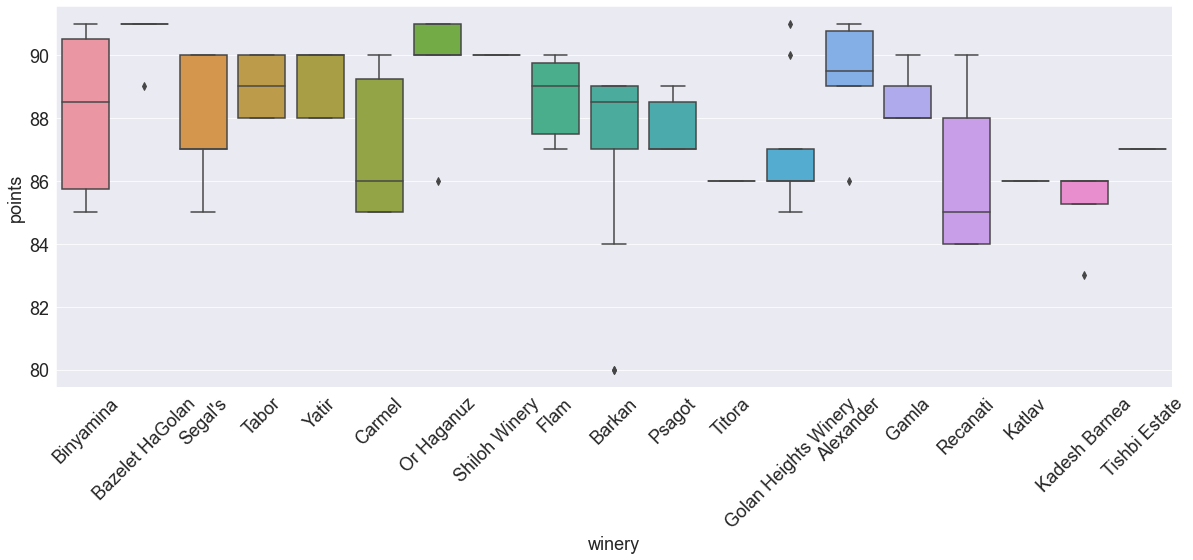

In [17]:
import seaborn as sns

sns.boxplot(x='winery', y='points', data=wine_df)
plt.xticks(rotation=45)
plt.show()

#### 3.

$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,\qquad \mathrm{SS}_{within} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
$$

In [18]:
from scipy.stats import f

k = len(valid_wineries)
n = len(wine_df)

y_bar = np.mean(wine_df['points'].values)  # mean over ALL valid wineries

SS_between = np.sum(
    [len(wine_df[wine_df['winery'] == w]) * (np.mean(wine_df.loc[wine_df['winery'] == w, 'points']) - y_bar) ** 2 for w
     in valid_wineries]
)

SS_within = np.sum(
    [np.sum(
        (wine_df.loc[wine_df['winery'] == w, 'points'] - np.mean(wine_df.loc[wine_df['winery'] == w, 'points'])) ** 2)
     for w in valid_wineries]
)

MS_between = SS_between / (k - 1)
MS_within = SS_within / (n - k)
F = MS_between / MS_within
p_value = f.sf(F, k - 1, n - k)

In [28]:
print(f"""
Source    Dof       SS                                       MS                          F
Groups    {k - 1}        {SS_between}                       {MS_between}          {F}
Error     {n - k}       {SS_within}                       {MS_within}
Total     {n - 1}       {SS_between + SS_within}
""")


Source    Dof       SS                                       MS                          F
Groups    18        240.82727591036402                       13.379293106131335          3.301378435366242
Error     116       470.10605742296923                       4.05263842606008
Total     134       710.9333333333333



In [20]:
print('The trivial Null Hypothesis claims that all wineries make the same Cabernets (no winery is better than others).')
print(
    f'Since our p-value ({round(p_value, 4)}) is small, it means some level of significance, and we can therefore reject the Null Hypothesis and say that THERE ARE some wineries that make better Cabernets than others.')

The trivial Null Hypothesis claims that all wineries make the same Cabernets (no winery is better than others).
Since our p-value (0.0001) is small, it means some level of significance, and we can therefore reject the Null Hypothesis and say that THERE ARE some wineries that make better Cabernets than others.


#### 4.

In [34]:
# All possible pairs in List
# Using list comprehension + enumerate()
all_pairs = [(a, b) for idx, a in enumerate(valid_wineries) for b in valid_wineries[idx + 1:]]

$$
t = \frac{\bar{Y_1} - \bar{Y_0}}{s \sqrt{\frac{1}{n_1} + \frac{1}{n_0}}}, s
= \sqrt{\frac{\sum_{i=1}^{n_1}(y_{1i}-\mu_1)^2 + \sum_{i=1}^{n_0}(y_{0i}-\mu_0)^2 }
{n_0+n_1-2}}
$$

In [29]:
def pair_ttest(y_0, y_1):
    n_0 = len(y_0)
    n_1 = len(y_1)
    mu_0 = np.mean(y_0)
    mu_1 = np.mean(y_1)
    degrees_of_freedom = n_0 + n_1 - 2
    s = np.sqrt((np.sum((y_0 - mu_0) ** 2) + np.sum((y_1 - mu_1) ** 2)) / degrees_of_freedom)

    if s <= 0:
        s = 1e-6

    numerator = mu_1 - mu_0
    denominator = s * np.sqrt((1 / n_0) + (1 / n_1))
    t = numerator / denominator

    return t, degrees_of_freedom

In [30]:
from scipy.stats import t as ttest

p_values = []

for w_0, w_1 in all_pairs:
    y_0 = wine_df.loc[wine_df['winery'] == w_0, 'points']
    y_1 = wine_df.loc[wine_df['winery'] == w_1, 'points']
    t, degrees_of_freedom = pair_ttest(y_0, y_1)
    p_value = ttest.sf(abs(t), degrees_of_freedom)
    p_values.append(p_value)

In [32]:
alpha = 0.05
p_values_below = list(filter(lambda x: x < (alpha / 2), p_values))
print(f'{len(p_values_below)} p-values (out of {len(p_values)}) fall below {alpha}')

print(f'It is more than what is expected if all tests are null.\n'
      f'It is expected that {round(alpha * len(p_values))} will be rejected.')

59 p-values (out of 171) fall below 0.05
It is more than what is expected if all tests are null.
It is expected that 9 will be rejected.


In [41]:
# 4.4.2 (added after submission)
alpha_bonferroni = alpha / len(p_values)
p_values_bonferroni_below = list(filter(lambda x: x < (alpha_bonferroni / 2), p_values))
print(f'{len(p_values_bonferroni_below)} p-values (out of {len(p_values)}) fall below {alpha} after Bonferroni\'s correction')

9 p-values (out of 171) fall below 0.05 after Bonferroni's correction
